In [ ]:
import pandas as pd
import re
import numpy as np
import os
import tensorflow as tf


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Read the CSV file v0.1 intg clean data.csv 
df = pd.read_csv('/content/v0.1  intg clean data.csv')
df.head()

,Label,Ingredients
0,1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,1,"Galactomyces Ferment Filtrate (Pitera), Butyle..."
2,1,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary..."
3,1,"Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,1,"Water, Snail Secretion Filtrate, Phenyl Trimet..."


In [ ]:
# Select the first row of the DataFrame using iloc
df.iloc[0:1,]

,Label,Ingredients
0,1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat..."


In [ ]:
# Retrieve the value in the 'Ingredients' column of the first row using iloc
df.iloc[0]['Ingredients']

'Algae (Seaweed) Extract, Mineral Oil, Petrolatum, Glycerin, Isohexadecane, Microcrystalline Wax, Lanolin Alcohol, Citrus Aurantifolia (Lime) Extract, Sesamum Indicum (Sesame) Seed Oil, Eucalyptus Globulus (Eucalyptus) Leaf Oil, Sesamum Indicum (Sesame) Seed Powder, Medicago Sativa (Alfalfa) Seed Powder, Helianthus Annuus (Sunflower) Seedcake, Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal, Sodium Gluconate, Copper Gluconate, Calcium Gluconate, Magnesium Gluconate, Zinc Gluconate, Magnesium Sulfate, Paraffin, Tocopheryl Succinate, Niacin, Water, Beta-Carotene, Decyl Oleate, Aluminum Distearate, Octyldodecanol, Citric Acid, Cyanocobalamin, Magnesium Stearate, Panthenol, Limonene, Geraniol, Linalool, Hydroxycitronellal, Citronellol, Benzyl Salicylate, Citral, Sodium Benzoate, Alcohol Denat., Fragrance.'

In [ ]:
# Select the first three rows from the first column of the DataFrame using iloc
df[df.columns[:1]].iloc[0:3]

,Label
0,1
1,1
2,1


In [ ]:
# from tensorflow.keras.layers import TextVectorization
a = df['Ingredients']
b = df[df.columns[:1]].values

a


0      Algae (Seaweed) Extract, Mineral Oil, Petrolat...
1      Galactomyces Ferment Filtrate (Pitera), Butyle...
2      Water, Dicaprylyl Carbonate, Glycerin, Ceteary...
3      Algae (Seaweed) Extract, Cyclopentasiloxane, P...
4      Water, Snail Secretion Filtrate, Phenyl Trimet...
                             ...                        
768                                           Tribehenin
769                                    Trihydroxystearin
770                                        Triisostearin
771                                        Galactomyces 
772                        Galactomyces Ferment Filtrate
Name: Ingredients, Length: 773, dtype: object

In [ ]:
df.columns

Index(['Label', 'Ingredients'], dtype='object')

In [ ]:
df.dtypes

Label           int64
Ingredients    object
dtype: object

In [ ]:
def proses_data(text):
    newText = text.lower() # Convert the text to lowercase
    return newText

data = df['Ingredients']
data = data.apply(lambda x: proses_data(x)) # Apply the 'proses_data' function to each element in the 'Ingredients' column using lambda
data.head()

0    algae (seaweed) extract, mineral oil, petrolat...
1    galactomyces ferment filtrate (pitera), butyle...
2    water, dicaprylyl carbonate, glycerin, ceteary...
3    algae (seaweed) extract, cyclopentasiloxane, p...
4    water, snail secretion filtrate, phenyl trimet...
Name: Ingredients, dtype: object

In [ ]:
def link_remover(text):
    url_regex = re.compile(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
    return url_regex.sub('', text)
data = data.apply(lambda x: link_remover(x))

# Replace special characters (non-alphanumeric and non-whitespace) with a space
def karakter_spesial(text):
    newText = re.sub('[^\w\s]', ' ', text)
    return newText
data = data.apply(lambda x: karakter_spesial(x))

# Remove excessive whitespaces
def Spasi_berlebihan(text):  
    newText = re.sub('\s+', '', text)
    newText = re.sub('^\s+', '', text)
    return newText
data = data.apply(lambda x: Spasi_berlebihan(x))


# Display the last 100 rows of the processed 'data' column
data.tail(100)

673               passion flower oil
674                passion fruit oil
675                       pataua oil
676                        peach oil
677                       peanut oil
                   ...              
768                       tribehenin
769                trihydroxystearin
770                    triisostearin
771                    galactomyces 
772    galactomyces ferment filtrate
Name: Ingredients, Length: 100, dtype: object

In [ ]:
# Maximum number of unique words to consider in the text data
MAX_WORD = 20000

# Maximum length of a sequence or sentence to be used in analysis or modeling
MAX_SEQ = 1000

In [ ]:
from tensorflow.keras.layers import TextVectorization

# Create a TextVectorization layer with specified parameters
data = TextVectorization(max_tokens=MAX_WORD, output_sequence_length=1000, output_mode='int')
data

In [ ]:
# Adapt the TextVectorization layer to the values of the input dataset or text data
data.adapt(a.values)
a.values

array(['Algae (Seaweed) Extract, Mineral Oil, Petrolatum, Glycerin, Isohexadecane, Microcrystalline Wax, Lanolin Alcohol, Citrus Aurantifolia (Lime) Extract, Sesamum Indicum (Sesame) Seed Oil, Eucalyptus Globulus (Eucalyptus) Leaf Oil, Sesamum Indicum (Sesame) Seed Powder, Medicago Sativa (Alfalfa) Seed Powder, Helianthus Annuus (Sunflower) Seedcake, Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal, Sodium Gluconate, Copper Gluconate, Calcium Gluconate, Magnesium Gluconate, Zinc Gluconate, Magnesium Sulfate, Paraffin, Tocopheryl Succinate, Niacin, Water, Beta-Carotene, Decyl Oleate, Aluminum Distearate, Octyldodecanol, Citric Acid, Cyanocobalamin, Magnesium Stearate, Panthenol, Limonene, Geraniol, Linalool, Hydroxycitronellal, Citronellol, Benzyl Salicylate, Citral, Sodium Benzoate, Alcohol Denat., Fragrance.',
       'Galactomyces Ferment Filtrate (Pitera), Butylene Glycol, Pentylene Glycol, Water, Sodium Benzoate, Methylparaben, Sorbic Acid.',
       'Water, Dicaprylyl Carbonate, Gly

In [ ]:
data('Glycerin')[:2]

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([11,  0])>

In [ ]:
# Retrieve the vocabulary learned by the TextVectorization layer
data.get_vocabulary()

['',
 '[UNK]',
 'extract',
 'oil',
 'sodium',
 'acid',
 'glycol',
 'leaf',
 'water',
 'seed',
 'fruit',
 'glycerin',
 'flower',
 'alcohol',
 'root',
 'phenoxyethanol',
 'butylene',
 'hyaluronate',
 'ci',
 'disodium',
 'stearate',
 'dimethicone',
 'edta',
 'glyceryl',
 'gum',
 'citric',
 'citrus',
 'ferment',
 'potassium',
 'aloe',
 'fragrance',
 'hydrolyzed',
 'crosspolymer',
 'hydroxide',
 'caprylyl',
 'benzoate',
 'ethylhexylglycerin',
 'camellia',
 'barbadensis',
 'copolymer',
 'xanthan',
 'tocopheryl',
 'sinensis',
 'officinalis',
 'hydrogenated',
 'chloride',
 'betaine',
 'acetate',
 'gluconate',
 'cetyl',
 'tocopherol',
 'panthenol',
 'filtrate',
 'propanediol',
 'limonene',
 'glucoside',
 'carbomer',
 'sorbate',
 'methyl',
 'magnesium',
 'cetearyl',
 'butter',
 'pentylene',
 'peel',
 'sativa',
 'rosa',
 'powder',
 'linalool',
 'juice',
 '12hexanediol',
 'phosphate',
 'bark',
 'polysorbate',
 'citrate',
 'aurantium',
 'triglyceride',
 'dulcis',
 'cocoyl',
 'capryliccapric',
 'alb

In [ ]:
vocabulary = data.get_vocabulary()
print('Vocabulary length:',len(vocabulary))

Vocabulary length: 2635


In [ ]:
# create txt file for vocabulary
import json
with open("./vocabulary.v0.2.json", "w") as output:
    output.write(json.dumps(data.get_vocabulary()))

In [ ]:
kalimat_text = data(a.values)

In [ ]:
len(a)

773

In [ ]:
kalimat_text

<tf.Tensor: shape=(773, 1000), dtype=int64, numpy=
array([[ 114,  343,    2, ...,    0,    0,    0],
       [ 395,   27,   52, ...,    0,    0,    0],
       [   8,  309,  162, ...,    0,    0,    0],
       ...,
       [1418,    0,    0, ...,    0,    0,    0],
       [ 395,    0,    0, ...,    0,    0,    0],
       [ 395,   27,   52, ...,    0,    0,    0]])>

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((kalimat_text, b))
dataset = dataset.cache()
dataset = dataset.shuffle(773)
dataset = dataset.batch(20)

In [ ]:
batch_a, batch_b = dataset.as_numpy_iterator().next()

In [ ]:
batch_b.shape

(20, 1)

In [ ]:
# Split the dataset into training, validation, and test sets based on the specified proportions
train = dataset.take(int(len(dataset)*.8)) # 80% for training
validation = dataset.skip(int(len(dataset)*.8)).take(int(len(dataset)*.9)) # 10% for validation
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))# 10% for testing

In [ ]:
# Retrieve a single batch of data from the train dataset
train.as_numpy_iterator().next()

(array([[ 192,    3,    0, ...,    0,    0,    0],
        [   8,   16,    6, ...,    0,    0,    0],
        [1810,    6, 2262, ...,    0,    0,    0],
        ...,
        [1427,    5,    0, ...,    0,    0,    0],
        [1394,    5,    0, ...,    0,    0,    0],
        [   8,   11,   90, ...,    0,    0,    0]]),
 array([[1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1]]))

In [ ]:
# Retrieve a single batch of data from the validation dataset
validation.as_numpy_iterator().next()

(array([[   8,  935,  159, ...,    0,    0,    0],
        [   4,   77,  441, ...,    0,    0,    0],
        [1036,   61,    0, ...,    0,    0,    0],
        ...,
        [1137, 2416,   12, ...,    0,    0,    0],
        [ 224,    3,    0, ...,    0,    0,    0],
        [ 377,  738,    0, ...,    0,    0,    0]]),
 array([[1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0]]))

In [ ]:
# Retrieve a single batch of data from the test dataset
test.as_numpy_iterator().next()

(array([[ 144,  139,   10, ...,    0,    0,    0],
        [  30,    0,    0, ...,    0,    0,    0],
        [ 106,  112,    0, ...,    0,    0,    0],
        ...,
        [   8,   53,  606, ...,    0,    0,    0],
        [1426,    5,    0, ...,    0,    0,    0],
        [1656, 2294,    0, ...,    0,    0,    0]]),
 array([[0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0]]))

In [ ]:
b[0]

array([1])

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D

**Building Model**

In [ ]:
#Build Model

# Define the sequential model for text classification
model = Sequential()
model.add(Embedding(MAX_WORD+1, 20))
model.add(LSTM(15, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 20)          400020    
                                                                 
 lstm (LSTM)                 (None, None, 15)          2160      
                                                                 
 global_max_pooling1d (Globa  (None, 15)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                512       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 402,725
Trainable params: 402,725
Non-trainable params: 0
__________________________________________________

In [ ]:
EPOCHS = 10
history = model.fit(train,validation_data=validation,epochs=EPOCHS)

Epoch 1/10
31/31 [==============================] - 11s 304ms/step - loss: 0.6910 - accuracy: 0.5355 - val_loss: 0.6869 - val_accuracy: 0.5294
Epoch 2/10
31/31 [==============================] - 9s 294ms/step - loss: 0.6801 - accuracy: 0.5403 - val_loss: 0.6636 - val_accuracy: 0.5752
Epoch 3/10
31/31 [==============================] - 9s 280ms/step - loss: 0.6267 - accuracy: 0.5387 - val_loss: 0.5498 - val_accuracy: 0.7320
Epoch 4/10
31/31 [==============================] - 8s 259ms/step - loss: 0.4324 - accuracy: 0.8952 - val_loss: 0.3364 - val_accuracy: 0.8497
Epoch 5/10
31/31 [==============================] - 8s 260ms/step - loss: 0.2772 - accuracy: 0.9177 - val_loss: 0.2250 - val_accuracy: 0.9477
Epoch 6/10
31/31 [==============================] - 11s 348ms/step - loss: 0.2112 - accuracy: 0.9484 - val_loss: 0.1637 - val_accuracy: 0.9608
Epoch 7/10
31/31 [==============================] - 9s 283ms/step - loss: 0.1965 - accuracy: 0.9435 - val_loss: 0.1936 - val_accuracy: 0.9412
Epoc

In [ ]:
history.history

{'loss': [0.6909840703010559,
  0.6801337003707886,
  0.6267073750495911,
  0.43241170048713684,
  0.2771908640861511,
  0.21123860776424408,
  0.19645968079566956,
  0.17408117651939392,
  0.2389276623725891,
  0.13727623224258423],
 'accuracy': [0.5354838967323303,
  0.5403226017951965,
  0.5387097001075745,
  0.8951612710952759,
  0.9177419543266296,
  0.948387086391449,
  0.9435483813285828,
  0.948387086391449,
  0.9080645442008972,
  0.9709677696228027],
 'val_loss': [0.6868846416473389,
  0.663629412651062,
  0.5497947335243225,
  0.33644455671310425,
  0.22501824796199799,
  0.16368819773197174,
  0.1935838758945465,
  0.17865648865699768,
  0.22275958955287933,
  0.09320426732301712],
 'val_accuracy': [0.529411792755127,
  0.5751634240150452,
  0.7320261597633362,
  0.8496732115745544,
  0.9477124214172363,
  0.9607843160629272,
  0.9411764740943909,
  0.9411764740943909,
  0.9084967374801636,
  0.9738562107086182]}

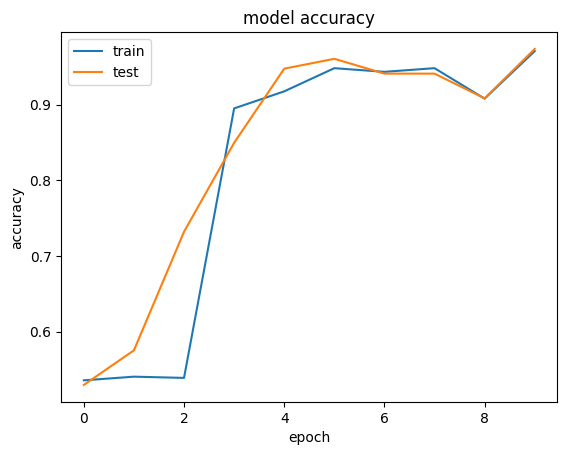

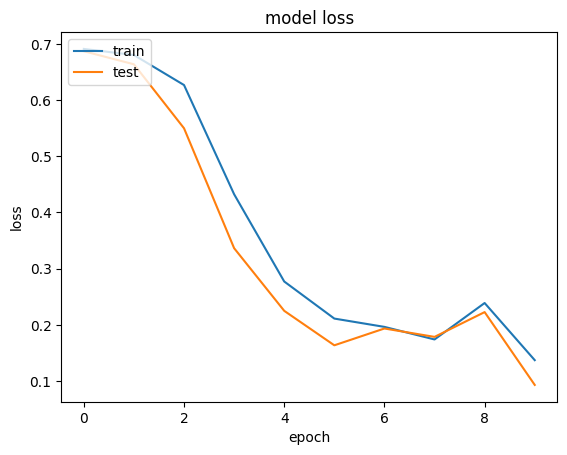

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
batch_c = test.as_numpy_iterator().next()

In [ ]:
masukan_text = data('Xylitol')

In [ ]:
model.predict(np.expand_dims(masukan_text,0))

1/1 [==============================] - 0s 37ms/step


array([[0.0147134]], dtype=float32)

In [ ]:
#Save model in h5 format
model.save('funne_sentiment_analysis.v.0.2.h5')

In [ ]:
#covert model to json

!pip install tensorflowjs
model = tf.keras.models.load_model('/content/funne_sentiment_analysis.v.0.2.h5')
import tensorflow as tf
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, '/content/')
!ls

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 105.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

 funne				     log.zip	  'v0.1  intg clean data.csv'
 funne_sentiment_analysis.v.0.2.h5   model.json    vocabulary.json
 group1-shard1of1.bin		     sample_data   vocabulary.v0.2.json
